# ML practice

## Get data

In [58]:
# See pandas notebook

import pandas as pd

melbourne_file_path = '../../data/melb_data.csv'
data = pd.read_csv(melbourne_file_path)
# dropna drops missing values (think of na as "not available")
# Remove rows with missing target, separate target from predictors
data.dropna(axis=0, subset=['Price'], inplace=True)
# One column
y = data.Price

# List of columns

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = data[melbourne_features]

## Sklearn
https://scikit-learn.org/stable/user_guide.html

### Define model

#### RandomForestRegressor

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Specify a number for random_state to ensure same results each run
my_model = RandomForestRegressor(random_state=1)

#### DecisionTreeRegressor

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Specify a number for random_state to ensure same results each run
my_model = DecisionTreeRegressor(random_state=1)

### Use the model

#### Train Test split

In [5]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

#### Fit model

In [6]:

my_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

#### Make Predictions

In [7]:
# Make validation predictions
val_predictions = my_model.predict(val_X)

#### Mean absolute error

In [8]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_predictions, val_y)

241632.16966126655

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    """ retune the mae of a DecisionTreeRegressor for a fixed max_leaf_nodes
    """
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# like that we can compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  356157
Max leaf nodes: 50  		 Mean Absolute Error:  264538
Max leaf nodes: 500  		 Mean Absolute Error:  222979
Max leaf nodes: 5000  		 Mean Absolute Error:  240506


#### Best tree size

356157.8826013371 for 5
281687.6016869558 for 25
264538.5759958539 for 50
243715.1555402675 for 100
229271.75328742765 for 250
222979.25446807843 for 500


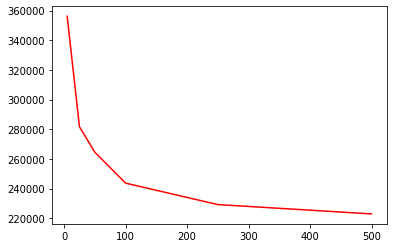

500


In [10]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
import matplotlib.pyplot as plt
%matplotlib inline

# Write loop to find the ideal tree size from candidate_max_leaf_nodes
def get_best_tree_size(candidate_max_leaf_nodes, train_X, val_X, train_y, val_y):
    maes = []
    for candidate_max_leaf_node in candidate_max_leaf_nodes:
        new_mae = get_mae(candidate_max_leaf_node, train_X, val_X, train_y, val_y)
        print(f"{new_mae} for {candidate_max_leaf_node}")
        maes.append(new_mae)
    best_mae_index = maes.index(min(maes))
    best_tree_size = candidate_max_leaf_nodes[best_mae_index]
    

    plt.plot(candidate_max_leaf_nodes, maes, color="red")
    plt.show()
    print(best_tree_size)
    return best_tree_size

best_tree_size = get_best_tree_size(candidate_max_leaf_nodes, train_X, val_X, train_y, val_y)

#### Fit Model Using All Data

> You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate 
> by using all of the data and keeping that tree size.
> That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [11]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)

In [12]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)

## Global pipline

### Train model with train dataset

In [13]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target
iowa_file_path = '../../data/train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice

# Create X (After completing the exercise, you can return to modify this line!)
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21,857


Don't forget to fine tune the model like already done in `Best tree size` section 👆

### Train a model for the competition or real data

In [14]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

RandomForestRegressor(random_state=1)

### Apply your model to make predictions

In [15]:
# path to file you will use for predictions
test_data_path = '../../data/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

### Generate a submission

In [16]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

## Missing Values

In [17]:
data = pd.read_csv(melbourne_file_path)
# dropna drops missing values (think of na as "not available")
# Remove rows with missing target, separate target from predictors
data.dropna(axis=0, subset=['Price'], inplace=True)

# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

#### Preliminary investigation

In [18]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(10864, 12)
Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


In [19]:
#### Function for comparing different approaches

In [20]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid, n_estimators=10, random_state=0, model_type="random_forest"):
    if model_type == "random_forest":
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    else:
        raise NotImplementedError(f'model type {model_type} not managed now in the code')
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

#### Drop Columns with Missing Values

Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [21]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635


#### An Extension to Imputation

we impute the missing values, while also keeping track of which values were imputed.

In [22]:
from sklearn.impute import SimpleImputer

# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation

# we use SimpleImputer to replace missing values with the mean value along each column.
# 
# Although it's simple, filling in the mean value generally performs quite well 
# (but this varies by dataset). While statisticians have experimented 
# with more complex ways to determine imputed values (such as regression imputation, 
# for instance), the complex strategies typically give no additional benefit once
# you plug the results into sophisticated machine learning models.

# SimpleImputer
my_imputer = SimpleImputer() 
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


#### Use the preprocessed test features and the trained model to generate test predictions in `test_preds`

In [23]:
X_valid_plus.describe()

Rooms     Distance     Postcode     Bedroom2     Bathroom  \
count  2716.000000  2716.000000  2716.000000  2716.000000  2716.000000   
mean      2.924153    10.194809  3103.889175     2.905744     1.530560   
std       0.931617     5.817486    88.682390     0.934281     0.687822   
min       1.000000     0.000000  3000.000000     0.000000     0.000000   
25%       2.000000     6.200000  3044.000000     2.000000     1.000000   
50%       3.000000     9.400000  3084.000000     3.000000     1.000000   
75%       3.000000    13.000000  3146.000000     3.000000     2.000000   
max       8.000000    45.900000  3977.000000     9.000000     7.000000   

               Car      Landsize  BuildingArea    YearBuilt    Lattitude  \
count  2703.000000   2716.000000   1422.000000  1648.000000  2716.000000   
mean      1.631521    528.590943    144.756506  1964.064927   -37.806372   
std       0.968985   1671.270666    118.713843    40.583510     0.078376   
min       0.000000      0.000000      0.000000  1196.000000   -38.164040   
25%       1.000000    172.000000     92.125000  1940.000000   -37.855200   
50%       2.000000    444.000000    126.000000  1970.000000   -37.802050   
75%       2.000000    652.000000    173.000000  1998.000000   -37.754080   
max      10.000000  76000.000000   3558.000000  2017.000000   -37.496740   

        Longtitude  Propertycount  
count  2716.000000    2716.000000  
mean    144.995868    7372.124816  
std       0.105085    4452.660778  
min     144.557840     389.000000  
25%     144.929150    4217.000000  
50%     144.999500    6482.000000  
75%     145.059955    9704.000000  
max     145.526350   21650.000000

In [24]:
# Preprocess test data
final_X_valid = pd.DataFrame(my_imputer.fit_transform(X_valid_plus))
final_X_valid.describe()

# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(imputed_X_train_plus, y_train)


# Get test predictions
test_preds = model.predict(final_X_valid)

/home/thomas/Documents/Dev/dev-snippets/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Categorical Variables

### Investigating cardinality

In [25]:
# We won't focus on the data loading step

data = pd.read_csv(melbourne_file_path)

# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

In [26]:
# Apply ordinal encoder 
s = (X_train_full.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname']

In [27]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train_full[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Type', 3),
 ('Method', 5),
 ('Regionname', 8),
 ('Date', 58),
 ('SellerG', 251),
 ('Suburb', 308),
 ('Address', 10742)]

### Categorical columns low cardinality

In [28]:
# Select categorical columns with relatively low cardinality

cardinality_max = 10

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [
    cname for cname in X_train_full.columns
        if X_train_full[cname].nunique() < cardinality_max 
        and X_train_full[cname].dtype == "object"
]

In [29]:
# Select numerical columns
numerical_cols = [
    cname for cname in X_train_full.columns
    if X_train_full[cname].dtype in ['int64', 'float64']
]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()



X_train.head()

Type Method             Regionname  Rooms  Distance  Postcode  Bedroom2  \
12167    u      S  Southern Metropolitan      1       5.0    3182.0       1.0   
6524     h     SA   Western Metropolitan      2       8.0    3016.0       2.0   
8413     h      S   Western Metropolitan      3      12.6    3020.0       3.0   
2919     u     SP  Northern Metropolitan      3      13.0    3046.0       3.0   
6043     h      S   Western Metropolitan      3      13.3    3020.0       3.0   

       Bathroom  Landsize  Lattitude  Longtitude  Propertycount  
12167       1.0       0.0  -37.85984    144.9867        13240.0  
6524        2.0     193.0  -37.85800    144.9005         6380.0  
8413        1.0     555.0  -37.79880    144.8220         3755.0  
2919        1.0     265.0  -37.70830    144.9158         8870.0  
6043        1.0     673.0  -37.76230    144.8272         4217.0

### Get list of categorical variables

In [30]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Type', 'Method', 'Regionname']


### Approach: Drop Categorical Variables

In [31]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid, n_estimators=100))

MAE from Approach 1 (Drop categorical variables):
175703.48185157913


### Approach: Ordinal Encoding

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid, n_estimators=100))

MAE from Approach 2 (Ordinal Encoding):
165936.40548390493


### Approach: One-Hot Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid, n_estimators=100))


MAE from Approach 3 (One-Hot Encoding):


/home/thomas/Documents/Dev/dev-snippets/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/thomas/Documents/Dev/dev-snippets/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


166089.4893009678


### Categorical columns that will not have the same as in training and validation data

In [34]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_valid[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['Type', 'Method', 'Regionname']

Categorical columns that will be dropped from the dataset: []


In [35]:
# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

## Pipelines

### Step 0: Data preparation

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_file_path = '../../data/train.csv'
data = pd.read_csv(train_file_path)

# Separate target from predictors
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [37]:
X_train.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
618       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
870       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
92        RL   Pave  Grvl      IR1         HLS    AllPub    Inside       Gtl   
817       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
302       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   

    Condition1 Condition2  ... GarageArea WoodDeckSF OpenPorchSF  \
618       Norm       Norm  ...        774          0         108   
870       PosN       Norm  ...        308          0           0   
92        Norm       Norm  ...        432          0           0   
817       Norm       Norm  ...        857        150          59   
302       Norm       Norm  ...        843        468          81   

    EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold  
618             0         0         260        0       0      7   2007  
870             0         0           0        0       0      8   2009  
92             44         0           0        0       0      8   2009  
817             0         0           0        0       0      7   2008  
302             0         0           0        0       0      1   2006  

[5 rows x 77 columns]

### Step 1: Define Preprocessing Steps

Similar to how a pipeline bundles together preprocessing and modeling steps, we use the `ColumnTransformer` class to bundle together different preprocessing steps. The code below:

* imputes missing values in numerical data, and
* imputes missing values and applies a one-hot encoding to categorical data.


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Step 2: Define the Model

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

### Step 3: Create and Evaluate the Pipeline

Finally, we use the `Pipeline` class to define a pipeline that bundles the preprocessing and modeling steps. There are a few important things to notice:

* With the pipeline, we preprocess the training data and fit the model in a single line of code. (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. This becomes especially messy if we have to deal with both numerical and categorical variables!)
* With the pipeline, we supply the unprocessed features in `X_valid` to the `predict()` command, and the pipeline automatically preprocesses the features before generating predictions. (However, without a pipeline, we have to remember to preprocess the validation data before making predictions.)


In [40]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17740.290308219177


### Step 4: Generate test predictions

Now, the trained model to generate predictions with the test data. :warning: if the `MAE` is controlled

In [41]:
X_test_full = pd.read_csv('../../data/test.csv')
X_test = X_test_full[my_cols].copy()
preds_test = my_pipeline.predict(X_test)

# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

## Cross-Validation

In [42]:
# Then, we define a pipeline that uses an imputer to fill in missing values and a random forest model to make predictions.

# While it's possible to do cross-validation without pipelines, it is quite difficult! Using a pipeline will make the code remarkably straightforward.


from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [43]:
# We obtain the cross-validation scores with the cross_val_score() function from scikit-learn. We set the number of folds with the cv parameter.

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [18162.42065708 17520.67024641 18905.57446502]
Average MAE score (across experiments):
18196.22178950378


## XGBoost

In [62]:
data = pd.read_csv(melbourne_file_path)

# Keep selected columns only
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

X = data[cols_to_use]

# Select target
y = data.Price

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [63]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [64]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 237889.91084545286


### Parameter Tuning

#### [n_estimators](https://www.kaggle.com/code/alexisbcook/xgboost#n_estimators)

In [66]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 248360.91178893595


#### [early_stopping_rounds](https://www.kaggle.com/code/alexisbcook/xgboost#early_stopping_rounds)

In [67]:


my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))


/home/thomas/.local/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 238647.87257455816


#### [learning_rate](https://www.kaggle.com/code/alexisbcook/xgboost#learning_rate)

In [69]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

/home/thomas/.local/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 243485.7590988586
